# Zomato Exploratory Data Analysis

In [93]:
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/b/bd/Zomato_Logo.svg">')

## Importing The Relevant Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

## Importing The DataSet

In [20]:
dataset = pd.read_csv('https://github.com/anishaga/Exploratory-Data-Analyis---Zomato/blob/main/zomato.csv?raw=true',encoding ='latin-1')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Analysing The DataSet

#### Finding All The Columns

In [21]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### Finding All The Columns With Numerical Values

In [22]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Checking For NULL Value

In [23]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines Has 9 NULL Values

## Importing The Country Code - Country Name DataSet

In [24]:
country = pd.read_excel('https://github.com/anishaga/Exploratory-Data-Analyis---Zomato/blob/main/Country-Code.xlsx?raw=true')
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


## Adding A Country Name Column In Our DataSet As Per The Country Code

In [25]:
dataset =pd.merge(dataset,country,on='Country Code', how = 'left')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Distribution Of Countries In The DataSet

In [26]:
country_names = dataset.Country.value_counts().index
country_val = dataset.Country.value_counts().values

In [39]:
dataset.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Most Of The Restaurants On Zomato Are From `India`, `US` And `UK`, So Let's Just Plot A Pie Chart For Them

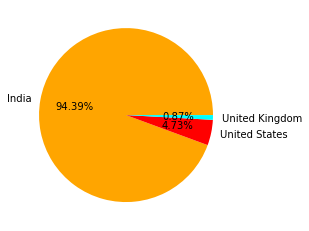

In [40]:
plt.pie(country_val[:3],labels=country_names[:3], autopct = '%1.2f%%', colors = ['orange', 'red', 'cyan']);

- **India** has `94.39`% Restaurants
- **US** has `4.73%` % Restaurants
- **UK** has `0.87%` % Restaurants

## Which Cities In India Have Highest Restaurants?

In [48]:
city_values = dataset.City.value_counts().values
city_labels = dataset.City.value_counts().index

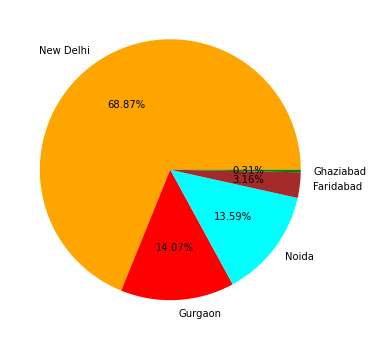

In [50]:
plt.pie(city_values[:5],labels=city_labels[:5], autopct = '%1.2f%%', colors = ['orange', 'red', 'cyan', 'brown', 'green']);

**New Delhi** Has Highest Restaurants, Followed By **Gurgaon** And **Noida**

## Where In Delhi Are Maximum Restaurants Present?

In [53]:
dataset[dataset['City']=='New Delhi']['Locality'].value_counts()[:5]

Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Pitampura           85
Name: Locality, dtype: int64

In **New Delhi**: *Connaught Place* - `(122)` , *Rajouri Garden* - `(99)`, *Shahdara* - `(87)`, *Defence Colony* - `(86)`, *Pitampura* - `(85)` Are The Top 5 Localities

## Checking Ratings Of The Restaurants

In [56]:
ratings = dataset.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


- Ratings between `4.5` to `4.9` Indicates That The Restaurant Is **Excellent**
- Ratings between `4.0` to `4.4` Indicates That The Restaurant Is **Very Good**
- Ratings between `3.5` to `3.9` Indicates That The Restaurant Is **Good**
- Ratings between `2.5` to `3.4` Indicates That The Restaurant Is **Average**
- Ratings between `1.8` to `2.4` Indicates That The Restaurant Is **Poor**

Plotting A Bar Plot To See Ratings Visually

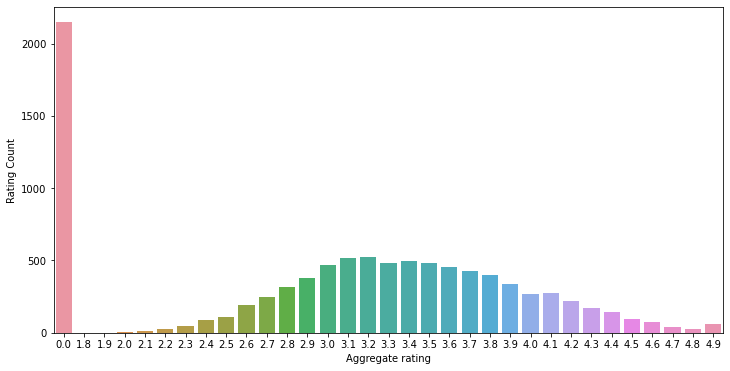

In [44]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings);

- Not Rated Restaurants (0 Rating) Are Very High
- Most Of The Restaurants Are Rated `3.0` - `3.7`

## Which Countries Have Online Delivery Option?

In [63]:
online = dataset[dataset['Has Online delivery'] =="Yes"].Country.value_counts()
online

India    2423
UAE        28
Name: Country, dtype: int64

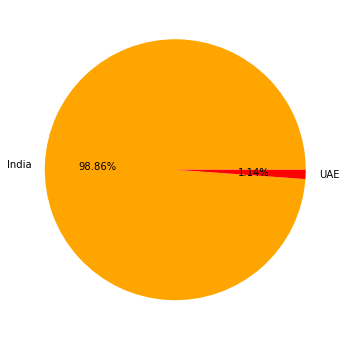

In [65]:
plt.pie(online.values, labels = online.index, autopct='%1.2f%%', colors = ['orange', 'red']);

- **India** has `2423` Restaurants With Online Delivery Option
- **UAE** has `28` Restaurants With Online Delivery Option
- In Other Countries Currently Zomato Doesn't Offer Online Delivery

## Average Cost For Two People

In [66]:
dataset.groupby('Country')['Average Cost for two'].mean().sort_values(ascending = False)

Country
Indonesia         281190.476190
Sri Lanka           2375.000000
Phillipines         1606.818182
India                623.370319
South Africa         419.733333
Qatar                223.750000
UAE                  166.416667
Singapore            155.750000
Brazil               134.666667
Turkey                84.852941
New Zealand           69.750000
United Kingdom        47.812500
Canada                36.250000
United States         26.152074
Australia             24.083333
Name: Average Cost for two, dtype: float64

Note: These Numbers Can't Be Directly Compared Because Every Country's Dollar Exchange Rate Is Different Hence Can't Be Compared Directly

##  Cities In India With Max And Min Average Cost For Two People

In [79]:
dataset[dataset['Country']=='India'].groupby('City')['Average Cost for two'].mean().sort_values()[-5:].sort_values(ascending = False)

City
Panchkula    2000.000000
Hyderabad    1361.111111
Pune         1337.500000
Jaipur       1310.000000
Kolkata      1272.500000
Name: Average Cost for two, dtype: float64

In [80]:
dataset[dataset['Country']=='India'].groupby('City')['Average Cost for two'].mean().sort_values(ascending =False)[-5:].sort_values()

City
Faridabad    447.609562
Amritsar     480.952381
Varanasi     505.000000
Allahabad    517.500000
Noida        539.490741
Name: Average Cost for two, dtype: float64

- Top 3 Cities With **Highest Average Cost** For Two People Are `Panchkula`, `Hyderabad` and `Pune`
- Top 3 Cities with **Least Average Cost** For Two People Are `Faridabad`, `Amritsar`, `Varanasi`

## Do Restaurants Offer Table Booking?

C:\Users\alofu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


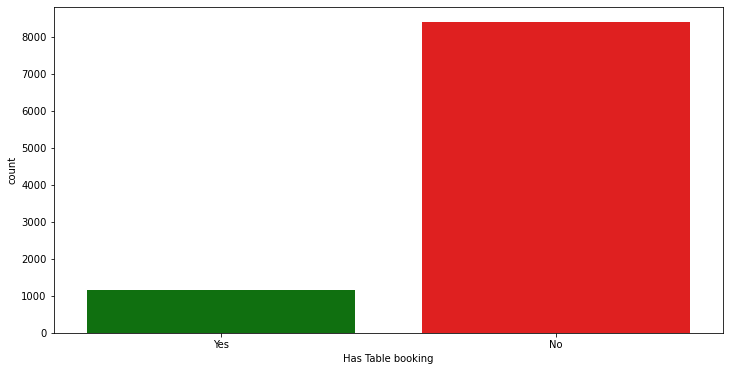

In [59]:
sns.countplot(dataset['Has Table booking'],palette=['green','red']);

Majority of Restaurants are **not offering** Table Bookings

## Do Restaurants Offer Online Delivery

C:\Users\alofu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


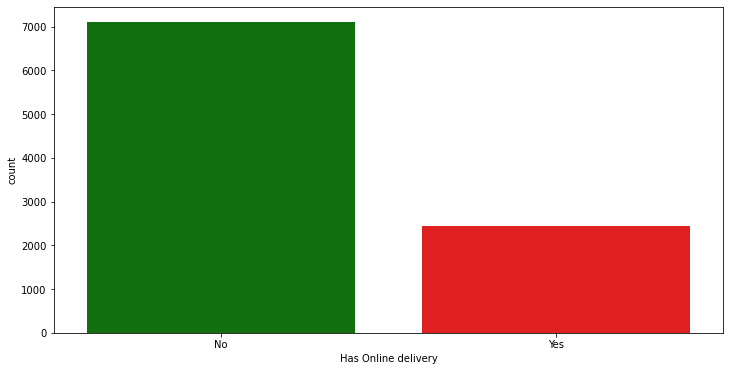

In [82]:
sns.countplot(dataset['Has Online delivery'],palette=['green','red']);

Most Of The Listed Restaurants **Do Not** Offer Online Delivery

## Variety Of Cuisines 

In [89]:
dataset['Cuisines'].value_counts()[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

### Variety of Cuisines Available Internationally

In [88]:
len(dataset['Cuisines'].unique())

1826

### Variety of Cuisines Available In India

In [87]:
len(dataset[dataset['Country']=='India']['Cuisines'].unique())

1392

- Number of Cuisines Available Internationally: `1826`
- Number of Cuisines Available In India: `1392`